In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 500)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[1]

array([0., 1.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
# model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, activation='tanh', return_sequences=False))
# of parameters = 64*32+32*32+32 = 3104
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 643,170
Trainable params: 643,170
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint_filepath = './temp/checkpoint_en'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [14]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics='accuracy')

In [15]:
history=model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.1, callbacks=[es, mc])

Epoch 1/20
176/176 [==============================] - 12s 66ms/step - loss: 0.6032 - accuracy: 0.6836 - val_loss: 0.4673 - val_accuracy: 0.8088
Epoch 2/20
176/176 [==============================] - 11s 64ms/step - loss: 0.4190 - accuracy: 0.8272 - val_loss: 0.3881 - val_accuracy: 0.8320
Epoch 3/20
176/176 [==============================] - 11s 64ms/step - loss: 0.3195 - accuracy: 0.8725 - val_loss: 0.4070 - val_accuracy: 0.8200
Epoch 4/20
176/176 [==============================] - 11s 64ms/step - loss: 0.2594 - accuracy: 0.9007 - val_loss: 0.3808 - val_accuracy: 0.8372
Epoch 5/20
176/176 [==============================] - 11s 64ms/step - loss: 0.2202 - accuracy: 0.9177 - val_loss: 0.3551 - val_accuracy: 0.8536
Epoch 6/20
176/176 [==============================] - 11s 65ms/step - loss: 0.1772 - accuracy: 0.9357 - val_loss: 0.3458 - val_accuracy: 0.8716
Epoch 7/20
176/176 [==============================] - 11s 64ms/step - loss: 0.1308 - accuracy: 0.9543 - val_loss: 0.3495 - val_accuracy:

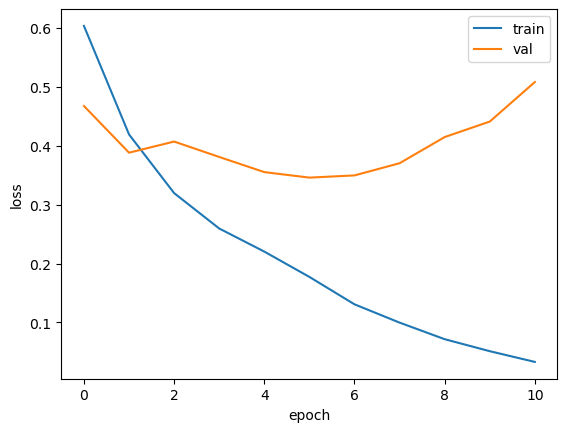

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
model.load_weights(checkpoint_filepath)

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 9s 11ms/step - loss: 0.3531 - accuracy: 0.8678


In [19]:
print('test_acc:', test_acc)

test_acc: 0.8677999973297119


In [20]:
preds = model.predict(x_test)

782/782 [==============================] - 8s 11ms/step


In [21]:
preds[0]

array([0.99870443, 0.0012956 ], dtype=float32)

In [22]:
import numpy as np
labels=[0,1]
preds1 = [labels[np.argmax(probs)] for probs in preds]

In [23]:
preds1[0]

0

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds1)

array([[10848,  1652],
       [ 1653, 10847]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

